In [278]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.misc

Now going to try a 3X3 matrix and see how much info we can squeeze out of it

In [279]:
resc=20
sc=6
rep=np.random.normal(.1,.0001,size=120)+np.linspace(0,1,120)#random probabilities for environments
rep/=np.sum(rep)#normalize so they add to one

In [323]:
re=rep.copy()
p=re[::(resc*sc)//sc]
p/=np.sum(p)
W=1.35*np.eye(sc)+.0090*np.arange(sc**2).reshape(sc,sc)+.5*np.random.rand(sc,sc)
#W=np.eye(sc)
#W/=np.sum(W)
#W=np.array([[1,2],[2,1]])
reW=scipy.misc.imresize(W,float(resc),'bicubic')+100*np.eye(sc*resc)
#reW/=(np.average(np.diag(reW))/1.5)
reV=np.linalg.inv(reW)/100
V=np.linalg.inv(W)
y=p/np.sum(V,axis=1)
x=np.dot(V,y)
rey=rep/np.sum(reV,axis=1)
rex=np.dot(reV,rey)

Now we know $x_i=\frac{\sum{v_{ij}p_j}}{\sum_k{v_{kj}}}$

This is because $\vec{x}=\bf{W}^{-1}\vec{y}$

And $y_k=\frac{p_k}{\sum_j{v_jk}}$

So that $\vec{y}=\vec{p}./\vec{\sum_j{v_{j\cdot}}}$

In [86]:
print("Prediction: 2-3p: "+str(2-3*p))
print("Sim: "+str(np.dot(V,y)))

Prediction: 2-3p: [ 0.6430185   1.04286684  1.31411466]
Sim: [ 1.85792696 -0.05131814 -1.65783674]


<Container object of 6 artists>

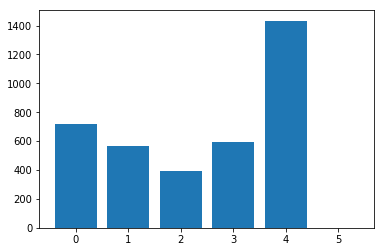

In [230]:
plt.bar(np.arange(len(x)),x-min(x),.8)

In [326]:
x/=x.sum()

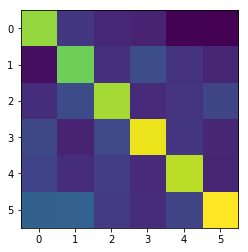

In [324]:
plt.imshow(W)

In [573]:
rep[::(resc*sc)//sc].size

6

In [132]:
test_y=W.T
test_x=np.linspace(0,1,3)
deg=2
coeffs=np.polyfit(test_x,test_y,deg)

In [133]:
coeffs

array([[ 1.5454682 , -4.8309705 ,  1.90939593],
       [-2.69768335,  4.90727661, -1.18739138],
       [ 1.40331698,  0.01981157,  0.39668494]])

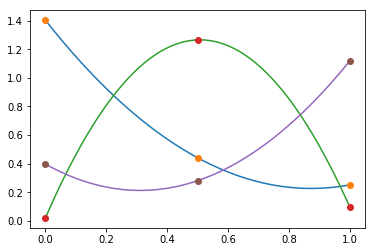

In [137]:
fit_x=np.linspace(0,1,1000)
fit_y=np.zeros((3,1000))
for i in range(3):
    fit_y[i,:]=coeffs[0,i]*fit_x**2+coeffs[1,i]*fit_x+coeffs[2,i]
    plt.plot(fit_x,fit_y[i,:])
    plt.plot(test_x,test_y[:,i],'o')
fit_W=np.zeros((1000,1000))
for i in range(3):
    fit_W[i,:]=fit_y

In [147]:
reW=scipy.misc.imresize(W,200.0)

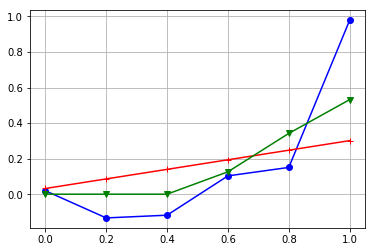

In [332]:
plt.plot(np.linspace(0,1,x.size),x,'bo-')
plt.plot(np.linspace(0,1,x.size),p,'r+-')
plt.plot(np.linspace(0,1,x.size),x_guess,'gv-')
plt.grid(True)

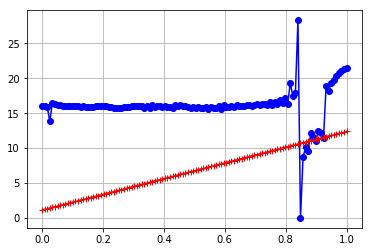

In [612]:
plt.plot(np.linspace(0,1,rex.size),rex-rex.min(),'bo-')
plt.plot(np.linspace(0,1,rex.size),rep*rex.max()/rep.max(),'r+-')
plt.grid(True)

In [99]:
x/=x.sum()

In [323]:
rex/=rex.sum()

In [470]:
W_try=np.random.rand(9,3)
np.linalg.inv(W_try)

LinAlgError: Last 2 dimensions of the array must be square

# $L=\sum_i{p_i\cdot log(\sum_j{W_{ij}\cdot x_j})}$

In [311]:
x_guess=np.random.random(6)+np.random.random()*np.arange(6)
x_guess/=x_guess.sum()


In [243]:
def L(x):
    return(p*np.log(np.dot(W,x).sum())).sum()


In [244]:
grad_L(x_guess)

array([ 0.09984175,  0.13544813,  0.17104276,  0.20664638,  0.24220938,
        0.2778561 ])

# $\frac{\partial L}{\partial x_k}=\frac{\sum_i{p_i\,W_{ik}}}{\sum_j{W_{ij}\,x_j}}$

In [245]:
def T(v):
    one=np.ones(v.size)
    return(v-(np.dot(v,one)/v.size)*one)

This is a projection operator onto the plane defined by $\sum_i{x_i}=1$, which ensures that "gradient descent" doesn't violate our constraint. Each step we take is actually not in the direction of the gradient, but in the direction of the projection of the gradient onto this plane

In [246]:
def grad_L(x):
    rtn=np.zeros(len(x))
    for k in range(x.size):
        numerator=np.dot(p,W[:,k]).sum()
        denominator=np.dot(W,x).sum()
        rtn[k]=numerator/denominator
    return(rtn)
    

In [328]:

alpha=.001
for i in range(50000):
    #alpha=min(x_guess)*.01
    l.append(L(x_guess))
    step=alpha*T(grad_L(x_guess))
    if(np.sum(x_guess+step<0)==0):
        x_guess+=step
    else:
        x_guess+=step
        x_guess[x_guess<0]=0
        x_guess/=x_guess.sum()
        
    
    

In [330]:
print(L(x_guess),L(x))

1.25504120359 1.22485392616


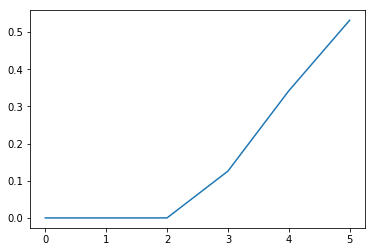

In [331]:
plt.plot(x_guess)

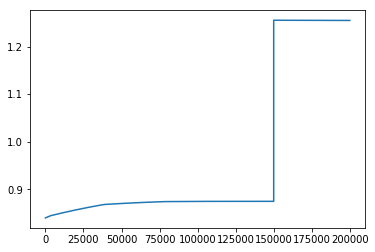

In [329]:
plt.plot(l)

In [255]:
x_guess+=np.random.rand(6)*.000001

In [723]:
def const(x):
    return 1-np.linalg.norm(x,1)
constraints=[{'type':'ineq', 'fun': const},{'type':'ineq','fun':x_pos}]

In [676]:
const_dict

{'fun': <function __main__.const>, 'type': 'eq'}

In [670]:
(.2+x_guess).sum()


2.2000000000000002

In [740]:
x_fit=minimize(L, np.full(6,1/6), constraints=constraints,method='cobyla',options={'disp': True})

In [710]:
def x_pos(x):
    return np.sum(x_guess<0)

In [741]:
x_fit

     fun: -0.79581656379905941
   maxcv: 4.61659579902296e-05
 message: 'Optimization terminated successfully.'
    nfev: 142
  status: 1
 success: True
       x: array([  7.47135092e-01,  -2.30829790e-05,   1.95226387e-03,
         8.44621433e-02,   4.79697278e-02,   1.18503856e-01])

In [673]:
from scipy.optimize import minimize

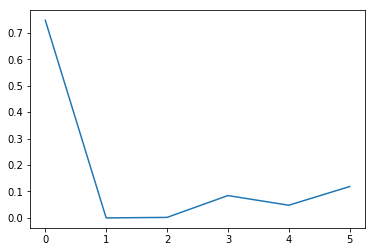

In [771]:
plt.plot(x_fit['x'])


In [728]:
np.sum(x_fit['x'])

1.0000672227162295

In [745]:
L(x)

-1.2638019467373285

In [746]:
from scipy import optimize

In [763]:
optimize.brute(L,[slice(0,1,.1) for i in range(6)])

/Users/dyanni3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


array([  4.46212928e+54,   1.13890408e+53,   5.39029377e+54,
         3.87320936e+54,   1.09541540e+54,   1.14362214e+55])

In [762]:
slice(0,1,.1)

slice(0, 1, 0.1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [764]:
x_fit['fun']

-0.79581656379905941

In [37]:
T(x)

array([-0.25610514, -0.24290372, -0.19881976, -0.09851868,  0.12102341,
        0.67532389])

An alternative is to use the Lagrangian $\prod_i{(\sum_j{W_{ij}\,x_j})^{p_i}}$